# Scipy

Scipy
NumPy和Scipy让Python有了MATLAB味道。Scipy依赖于NumPy，NumPy提供了多维数组功能，但只是一般的数组并不是矩阵。比如两个数组相乘时，只是对应元素相乘。Scipy提供了真正的矩阵，以及大量基于矩阵运算的对象与函数。
Scipy包含功能有最优化、线性代数、积分、插值、拟合、特殊函数、快速傅里叶变换、信号处理、图像处理、常微分方程求解等常用计算。
示例：Scipy求解非线性方程组和数值积分

In [1]:
# 求解方程组
from scipy.optimize import fsolve

def f(x):
    x1 = x[0]
    x2 = x[1]
    return [2 * x1 - x2 ** 2 - 1, x1 ** 2 - x2 - 2]


result = fsolve(f, [1, 1])
print(result)

[1.91963957 1.68501606]


In [2]:
# 积分
from scipy import integrate

def g(x):  # 定义被积函数
    return (1 - x ** 2) ** 0.5

pi_2, err = integrate.quad(g, -1, 1)  # 输出积分结果和误差
print(pi_2 * 2, err)

3.1415926535897967 1.0002354500215915e-09


# Matplotlib

Matplotlib
Python中著名的绘图库，主要用于二维绘图，也可以进行简单的三维绘图。

示例：Matplotlib绘图基本操作

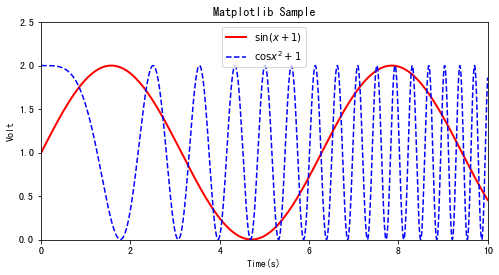

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 10000)  # 自变量x，10000为点的个数
y = np.sin(x) + 1  # 因变量y
z = np.cos(x ** 2) + 1  # 因变量z

plt.figure(figsize=(8, 4))  # 设置图像大小
# plt.rcParams['font.sans-serif'] = 'SimHei'  # 标签若有中文，则需设置字体
# plt.rcParams['axes.unicode_minus'] = False  # 保存图像时若负号显示不正常，则添加该句

# 两条曲线
plt.plot(x, y, label='$\sin (x+1)$', color='red', linewidth=2)  # 设置标签，线条颜色，线条大小
plt.plot(x, z, 'b--', label='$\cos x^2+1$')

plt.xlim(0, 10)  # x坐标范围
plt.ylim(0, 2.5)  # y坐标范围

plt.xlabel("Time(s)")  # x轴名称
plt.ylabel("Volt")  # y轴名称
plt.title("Matplotlib Sample")  # 图的标题

plt.legend()  # 显示图例
plt.show()  # 显示作图结果

# Scikit-Learn

Scikit-Learn依赖NumPy、Scipy和Matplotlib，是Python中强大的机器学习库，提供了诸如数据预处理、分类、回归、聚类、预测和模型分析等功能。

示例：创建线性回归模型

In [5]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
所有模型都提供的接口：
model.fit()：训练模型，监督模型是fit(X,y)，无监督模型是fit(X)

监督模型提供的接口：
model.predict(X_new)：预测新样本
model.predict_proba(X_new)：预测概率，仅对某些模型有用（LR）

无监督模型提供的接口：
model.ransform()：从数据中学到新的“基空间”
model.fit_transform()：从数据中学到的新的基，并将这个数据按照这组“基”进行转换

Scikit-Learn本身自带了一些数据集，如花卉和手写图像数据集等，下面以花卉数据集举个栗子，训练集包含4个维度——萼片长度、宽度，花瓣长度和宽度，以及四个亚属分类结果。
示例：

In [6]:
from sklearn import datasets  # 导入数据集
from sklearn import svm

iris = datasets.load_iris()  # 加载数据集
clf = svm.LinearSVC()  # 建立线性SVM分类器
clf.fit(iris.data, iris.target)  # 用数据训练模型
print(clf.predict([[5, 3, 1, 0.2], [5.0, 3.6, 1.3, 0.25]]))


[0 0]


/Users/mac/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Keras

Keras是基于Theano的深度学习库，它不仅可以搭建普通神经网络，还可以搭建各种深度学习模型，如自编码器、循环神经网络、递归神经网络、卷积神经网络等，运行速度也很快，简化了搭建各种神经网络模型的步骤，允许普通用户轻松搭建几百个输入节点的深层神经网络，定制度也很高。
示例：简单的MLP（多层感知器）

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()  # 模型初始化
model.add(Dense(20, 64))  # 添加输入层（20节点）、第一隐藏层（64节点）的连接
model.add(Activation('tanh'))  # 第一隐藏层用tanh作为激活函数
model.add(Dropout(0.5))  # 使用Dropout防止过拟合
model.add(Dense(64, 64))  # 添加第一隐藏层（64节点）、第二隐藏层（64节点）的连接
model.add(Activation('tanh'))  # 第二隐藏层用tanh作为激活函数
model.add(Dense(64, 1))  # 添加第二隐藏层（64节点）、输出层（1节点）的连接
model.add(Activation('sigmod'))  # 第二隐藏层用sigmod作为激活函数

sgd=SGD(lr=0.1,decay=1e-6,momentum=0.9,nesterov=True)  # 定义求解算法
model.compile(loss='mean_squared_error',optimizer=sgd)  # 编译生成模型，损失函数为平均误差平方和
model.fit(x_train,y_train,nb_epoch=20,batch_size=16)  # 训练模型
score = model.evaluate(X_test,y_test,batch_size=16)  # 测试模型

Using TensorFlow backend.


TypeError: `Dense` can accept only 1 positional arguments ('units',), but you passed the following positional arguments: [20, 64]

In [ ]:
参考：

Keras中文文档
如何计算两个文档的相似度（二）

# Genism

In [ ]:
Genism主要用来处理语言方面的任务，如文本相似度计算、LDA、Word2Vec等。

示例：

In [9]:
import logging
from gensim import models

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                    level=logging.INFO)

sentences = [['first', 'sentence'], ['second', 'sentence']]  # 将分好词的句子按列表形式输入
model = models.Word2Vec(sentences, min_count=1)  # 用以上句子训练词向量模型
print(model['sentence'])  # 输出单词sentence的词向量

2020-02-27 22:13:50,969 : INFO : collecting all words and their counts
2020-02-27 22:13:50,970 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-02-27 22:13:50,971 : INFO : collected 3 word types from a corpus of 4 raw words and 2 sentences
2020-02-27 22:13:50,972 : INFO : Loading a fresh vocabulary
2020-02-27 22:13:50,973 : INFO : effective_min_count=1 retains 3 unique words (100% of original 3, drops 0)
2020-02-27 22:13:50,974 : INFO : effective_min_count=1 leaves 4 word corpus (100% of original 4, drops 0)
2020-02-27 22:13:50,976 : INFO : deleting the raw counts dictionary of 3 items
2020-02-27 22:13:50,977 : INFO : sample=0.001 downsamples 3 most-common words
2020-02-27 22:13:50,979 : INFO : downsampling leaves estimated 0 word corpus (5.7% of prior 4)
2020-02-27 22:13:50,981 : INFO : estimated required memory for 3 words and 100 dimensions: 3900 bytes
2020-02-27 22:13:50,983 : INFO : resetting layer weights
2020-02-27 22:13:50,988 : INFO : training mo

[ 4.8784306e-03  6.7097507e-04 -6.8347371e-04 -1.7676000e-03
  7.2919548e-04 -4.1414998e-03  9.1723347e-04  3.6993874e-03
  2.2596314e-03  3.9329543e-03  1.5941205e-03 -3.4733079e-03
 -1.1463877e-03 -3.7982278e-03 -2.7578713e-03 -4.5897863e-03
 -4.7910749e-03  1.8770382e-03 -1.3433254e-03 -2.0885067e-04
 -1.0889012e-03  1.3153862e-03 -3.5857905e-03 -3.3918030e-03
  1.1652596e-03  2.4744953e-04 -1.9430415e-03 -3.5667031e-03
  2.9700333e-03  4.4924608e-03 -1.6847519e-03 -6.2277552e-04
  2.1750280e-03  1.1014754e-03 -9.5758477e-04  2.1197251e-03
  1.8826230e-04 -3.0156248e-03  3.0333886e-03 -1.7333272e-03
  3.0946520e-03 -3.1426987e-03  1.7165329e-03  3.0936014e-03
  1.1455563e-03  1.2380537e-03  3.7328822e-03 -9.0636325e-04
 -2.4854406e-03  4.7838520e-03  1.9432171e-03 -1.9758772e-03
 -7.0214184e-05  1.5246338e-04 -2.4801942e-03  2.9442781e-03
 -1.1557870e-03  3.8803550e-03 -3.0041626e-03  3.2844380e-03
 -4.4897851e-03 -1.0884083e-03 -3.3998818e-03 -3.9926637e-03
 -1.0306692e-03 -8.09664

/Users/mac/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [13]:
%pip install tensorflow

Looking in indexes: https://pypi.douban.com/simple/
     |████████████████████████████████| 120.8 MB 4.0 MB/s eta 0:00:011    |█████████████████████████▏      | 95.2 MB 4.4 MB/s eta 0:00:06
     |████████████████████████████████| 57 kB 4.0 MB/s eta 0:00:011
     |████████████████████████████████| 2.5 MB 1.9 MB/s eta 0:00:01     |██████████████████████████████▉ | 2.4 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 448 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 4.4 MB/s eta 0:00:011
     |████████████████████████████████| 584 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 1.8 MB/s eta 0:00:011
     |████████████████████████████████| 76 kB 1.9 MB/s eta 0:00:011
     |████████████████████████████████| 298 kB 949 kB/s eta 0:0

      Successfully uninstalled setuptools-40.8.0
    Running setup.py install for absl-py ... done
    Running setup.py install for opt-einsum ... done
    Running setup.py install for gast ... done
Note: you may need to restart the kernel to use updated packages.
